## **Import Libraries**

In [43]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import MinMaxScaler


## **Exploring Dataset**

In [3]:
data = pd.read_csv('Titanic-Dataset.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 891 entries, 0 to 890

Data columns (total 12 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   PassengerId  891 non-null    int64  

 1   Survived     891 non-null    int64  

 2   Pclass       891 non-null    int64  

 3   Name         891 non-null    object 

 4   Sex          891 non-null    object 

 5   Age          714 non-null    float64

 6   SibSp        891 non-null    int64  

 7   Parch        891 non-null    int64  

 8   Ticket       891 non-null    object 

 9   Fare         891 non-null    float64

 10  Cabin        204 non-null    object 

 11  Embarked     889 non-null    object 

dtypes: float64(2), int64(5), object(5)

memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **Check Missing Values**

In [ ]:
data.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [7]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_1472\1761542025.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(),inplace=True)


In [8]:
data.drop('Cabin' , inplace = True ,axis=1) # since cabin has lot of null values

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
data['Embarked'] = data['Embarked'].fillna('S')

In [12]:
data.isna().sum().sort_values(ascending=False) # no null values now

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
data.shape

(891, 11)

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## **Handling Categorical Features**

In [15]:
Sex = pd.get_dummies(data['Sex'],drop_first=True)
Embarked = pd.get_dummies(data['Embarked'],drop_first=True)

In [ ]:
data.drop(['Sex' , 'Embarked','Name','Ticket'],axis=1,inplace=True)

In [21]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


## **Visualizing Dataset After Cleaning**

<Axes: xlabel='Survived', ylabel='count'>

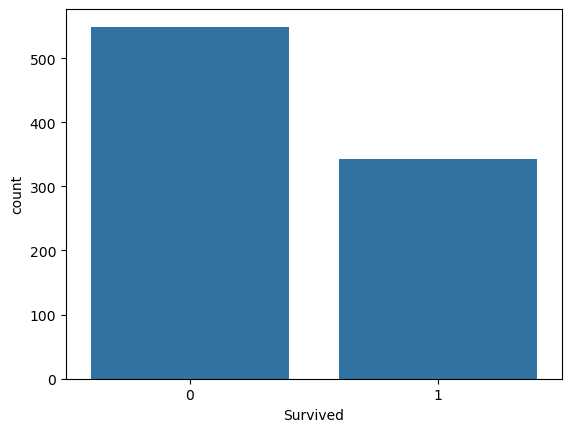

In [22]:
sns.countplot(x = 'Survived' , data=data)

<Axes: xlabel='Survived', ylabel='count'>

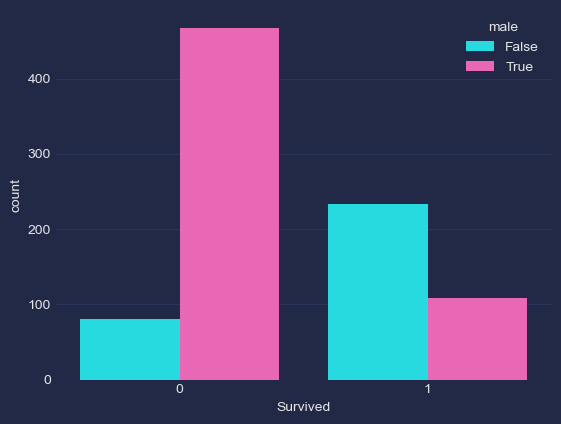

In [23]:
sns.countplot(x = 'Survived' , data=data ,hue='male')

### Clearly more women were rescued and saved

<Axes: xlabel='Survived', ylabel='count'>

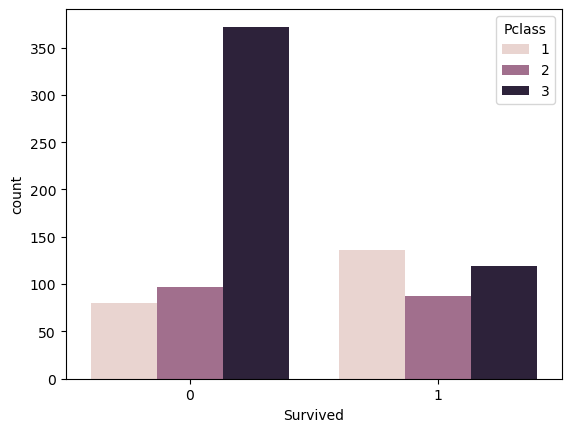

In [23]:
sns.countplot(x = 'Survived' , data=data ,hue='Pclass')

### 3rd class passengers died most

<Axes: >

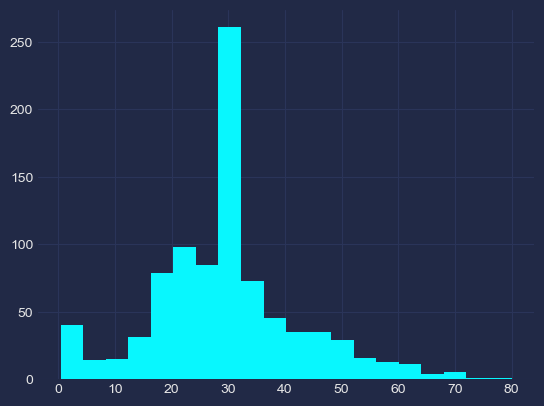

In [25]:
data['Age'].hist(bins=20)

## Preprocessing the data 

In [24]:
sc = MinMaxScaler()
data['Fare'] = sc.fit_transform(data['Fare'].values.reshape(-1, 1))

Text(0, 0.5, 'Frequency')

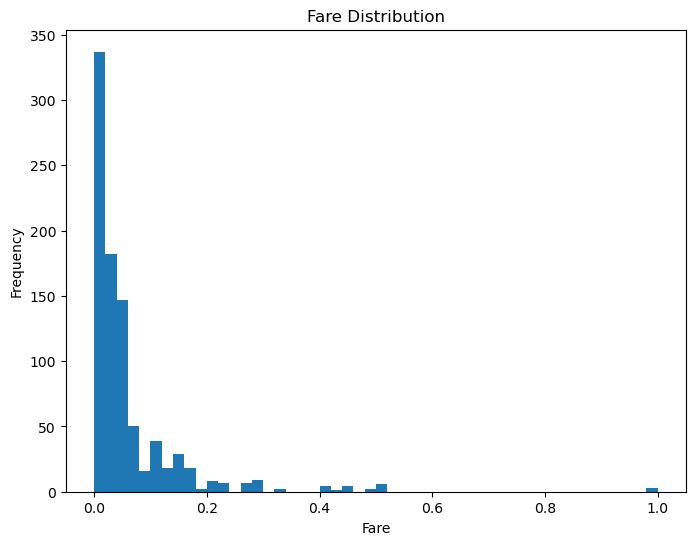

In [25]:
plt.figure(figsize=(8,6))
plt.hist(data['Fare'], bins = 50)
plt.title("Fare Distribution")
plt.xlabel('Fare')
plt.ylabel('Frequency')

### Now you see the fare is scaled between 0 & 1 and not between 7-500

In [26]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,0.014151,True,False,True
1,2,1,1,38.0,1,0,0.139136,False,False,False
2,3,1,3,26.0,0,0,0.015469,False,False,True
3,4,1,1,35.0,1,0,0.103644,False,False,True
4,5,0,3,35.0,0,0,0.015713,True,False,True


## **Building Models**

In [27]:
x = data.drop((['Survived' , 'PassengerId']) , axis = 1) # features
y = data['Survived'] # target

In [31]:
x

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.000000,1,0,0.014151,True,False,True
1,1,38.000000,1,0,0.139136,False,False,False
2,3,26.000000,0,0,0.015469,False,False,True
3,1,35.000000,1,0,0.103644,False,False,True
4,3,35.000000,0,0,0.015713,True,False,True
...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,0.025374,True,False,True
887,1,19.000000,0,0,0.058556,False,False,True
888,3,29.699118,1,2,0.045771,False,False,True
889,1,26.000000,0,0,0.058556,True,False,False


In [28]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 ,random_state=42)

In [30]:
x_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
331,1,45.500000,0,0,0.055628,True,False,True
733,2,23.000000,0,0,0.025374,True,False,True
382,3,32.000000,0,0,0.015469,True,False,True
704,3,26.000000,1,0,0.015330,True,False,True
813,3,6.000000,4,2,0.061045,False,False,True
...,...,...,...,...,...,...,...,...
106,3,21.000000,0,0,0.014932,False,False,True
270,1,29.699118,0,0,0.060508,True,False,True
860,3,41.000000,2,0,0.027538,True,False,True
435,1,14.000000,1,2,0.234224,False,False,True


### Decision tree model

In [44]:
decision_tree_model = DecisionTreeClassifier(max_depth=10,criterion='gini',min_samples_split=4,min_samples_leaf=4,max_features=None,random_state=42)
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=4,
                       random_state=42)

In [41]:
y_train_pred = decision_tree_model.predict(x_train)
accuracy_train_dt = accuracy_score(y_train, y_train_pred)
print("Accuracy on Training Set: {:.2f}".format(accuracy_train_dt* 100))

Accuracy on Training Set: 88.48


In [42]:
DT_Score = decision_tree_model.score(x_test, y_test)
print("Accuracy By Decision Tree Model:",DT_Score*100)

Accuracy By Decision Tree Model: 84.91620111731844
